### The following processes will be conducted in this data wrangling section:

### Reading the raw data from a CSV file

### Display data samples to understand its structure

### Data Cleaning: Identify and handle missing values

### Feature Engineering: Create new features based on existing ones (e.g., calculate mean income per zip code)

### Data Filtering: Filter out properties that are not relevant to the analysis (e.g., outliers or properties outside Austin city limits)

### # Feature Engineering: Create new features based on existing ones (e.g., calculate price per square foot)
#housing_data['price_per_sqft'] = housing_data['price'] / housing_data['sqft']

### Data Aggregation: Calculate average price per zip code
#average_price_per_neighborhood = housing_data.groupby('zip')['price'].mean()

### Data Merging: Combining housing data with demographic data

### Data Visualization: Visualize the data to gain insights and identify trends
#housing_data.plot.scatter(x='sqft', y='price', title='Price vs. Square Footage')
#plt.show()

### After data wrangling, the cleaned and transformed data can be used for further analysis and modeling.


In [1]:
# First, import the relevant modules and packages
import pandas as pd
import numpy as np
#from matplotlib import pyplot
import matplotlib.pyplot as plt

In [2]:
# Import Austin_TX_House_Listings_data_v1.csv & us_income_zipcode.csv
df1 = pd.read_csv('../01_raw_data/AustinTXHouseListingsDataV1.csv', low_memory=False)

In [3]:
# Displaying the first few rows of the raw data to understand its structure
df1.head()

,Unnamed: 0.1,Unnamed: 0,address_city,address_neighborhood,address_state,address_streetAddress,address_subdivision,address_zipcode,bathrooms,bedrooms,...,latest_salemonth,latest_saleyear,latest_price_source,numOfAccessibilityFeatures,numOfAppliances,numPhotos,numPriceChanges,photo,imagepath,cleanpath
0,0,15,Austin,NaN,TX,12801 Wooded Lake Ct,NaN,78732,5.0,4.0,...,2,2018,Agent Provided,0,3,39,1,https://photos.zillowstatic.com/fp/911f9a59acb...,/content/gdrive/MyDrive/zillow-images/70352485...,70352485_911f9a59acb6fe5fd909538a685e2a0c-p_f.jpg
1,1,16,Austin,NaN,TX,904 Lakewood Hills Ter,NaN,78732,5.0,5.0,...,8,2020,Broker Provided,0,3,58,2,https://photos.zillowstatic.com/fp/c6346c4a39d...,/content/gdrive/MyDrive/zillow-images/70352465...,70352465_c6346c4a39d1f87578ee1529329d9296-p_f.jpg
2,2,17,Austin,NaN,TX,13701 Montview Dr,NaN,78732,3.5,NaN,...,3,2018,Agent Provided,0,0,1,1,https://maps.googleapis.com/maps/api/streetvie...,/content/gdrive/MyDrive/zillow-images/83823478...,83823478_streetviewlocation13701MontviewDr2CAu...
3,3,18,Austin,NaN,TX,700 Lakewood Hills Ter,NaN,78732,4.0,4.0,...,6,2018,Agent Provided,0,1,40,4,https://photos.zillowstatic.com/fp/805b5a6b748...,/content/gdrive/MyDrive/zillow-images/70352478...,70352478_805b5a6b748b1d9cffeb93a4c41fedb0-p_f.jpg
4,4,19,Austin,Steiner Ranch-Lakewood Hills,TX,1008 Lakewood Hills Ter,NaN,78732,4.0,4.0,...,8,2019,Broker Provided,0,4,40,7,https://photos.zillowstatic.com/fp/a09cfad45a9...,/content/gdrive/MyDrive/zillow-images/70352461...,70352461_a09cfad45a949f7195c9540224f51e49-p_f.jpg


In [4]:
df1.shape

(16482, 736)

It looks like our data has more features (columns) than we need

In [5]:
#Analyze the summary of the data
df1.info

<bound method DataFrame.info of        Unnamed: 0.1  Unnamed: 0 address_city          address_neighborhood  \
0                 0          15       Austin                           NaN   
1                 1          16       Austin                           NaN   
2                 2          17       Austin                           NaN   
3                 3          18       Austin                           NaN   
4                 4          19       Austin  Steiner Ranch-Lakewood Hills   
...             ...         ...          ...                           ...   
16477         16479       22067       Austin                           NaN   
16478         16480       22070       Austin                           NaN   
16479         16481       22072       Austin                           NaN   
16480         16482       22073       Austin                           NaN   
16481         16483       22074       Austin                           NaN   

      address_state    address_

In [6]:
df1.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'address_city', 'address_neighborhood',
       'address_state', 'address_streetAddress', 'address_subdivision',
       'address_zipcode', 'bathrooms', 'bedrooms',
       ...
       'latest_salemonth', 'latest_saleyear', 'latest_price_source',
       'numOfAccessibilityFeatures', 'numOfAppliances', 'numPhotos',
       'numPriceChanges', 'photo', 'imagepath', 'cleanpath'],
      dtype='object', length=736)

In [7]:
# Analyze how the dependent variable, 'latest_price', is correlated with the rest of independent variables
dict(df1.corr()['latest_price'].abs().sort_values(ascending = False))

C:\Users\famma\AppData\Local\Temp\ipykernel_12172\1946049958.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dict(df1.corr()['latest_price'].abs().sort_values(ascending = False))


{'latest_price': 1.0,
 'taxAssessedValue': 0.8628559938898727,
 'taxAnnualAmount': 0.8156128587000064,
 'bathrooms': 0.551445307264037,
 'resoFactsStats_bathrooms': 0.47586093567052096,
 'livingArea': 0.3919678078297034,
 'resoFactsStats_bathroomsFull': 0.3854093485257164,
 'bedrooms': 0.3236994120035267,
 'resoFactsStats_bedrooms': 0.29769330047900794,
 'schools_2_rating': 0.2879634712029946,
 'schools_1_studentsPerTeacher': 0.2846390962391095,
 'schools_1_rating': 0.24097254565070483,
 'schools_0_rating': 0.23987455502465402,
 'schools_1_size': 0.23598605610932682,
 'resoFactsStats_bathroomsHalf': 0.22839099263704998,
 'stories': 0.21967042532231817,
 'numPhotos': 0.181905441001118,
 'longitude': 0.18157016525279043,
 'hasSpa': 0.17628657766491157,
 'coveredSpaces': 0.17196269771541464,
 'parking': 0.16639348500886164,
 'schools_2_studentsPerTeacher': 0.16305886359458596,
 'garageSpaces': 0.16297483664756376,
 'schools_0_distance': 0.15324071928582075,
 'address_zipcode': 0.152604521

In [8]:
#Create a "corr_r" row to filter out less correlated features (columns)
df1.loc['corr_r'] = df1.corr()['latest_price'].abs().sort_values(ascending = False)

C:\Users\famma\AppData\Local\Temp\ipykernel_12172\4094108136.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.loc['corr_r'] = df1.corr()['latest_price'].abs().sort_values(ascending = False)
C:\Users\famma\AppData\Local\Temp\ipykernel_12172\4094108136.py:2: FutureWarning: Behavior when concatenating bool-dtype and numeric-dtype arrays is deprecated; in a future version these will cast to object dtype (instead of coercing bools to numeric values). To retain the old behavior, explicitly cast bool-dtype arrays to numeric dtype.
  df1.loc['corr_r'] = df1.corr()['latest_price'].abs().sort_values(ascending = False)


In [9]:
# Check the new row
df1.tail()

,Unnamed: 0.1,Unnamed: 0,address_city,address_neighborhood,address_state,address_streetAddress,address_subdivision,address_zipcode,bathrooms,bedrooms,...,latest_salemonth,latest_saleyear,latest_price_source,numOfAccessibilityFeatures,numOfAppliances,numPhotos,numPriceChanges,photo,imagepath,cleanpath
16478,16480.00000,22070.000000,Austin,NaN,TX,6318 Clairmont Dr,NaN,78749.000000,2.000000,4.000000,...,1.000000,2018.000000,Agent Provided,0.000000,3.000000,33.000000,1.00000,https://photos.zillowstatic.com/fp/2f26fb52681...,/content/gdrive/MyDrive/zillow-images/29487158...,29487158_2f26fb52681290dd3e096cb85fc299ec-p_f.jpg
16479,16481.00000,22072.000000,Austin,NaN,TX,6104 Abilene Trl,NaN,78749.000000,2.000000,3.000000,...,1.000000,2018.000000,Agent Provided,0.000000,5.000000,25.000000,5.00000,https://photos.zillowstatic.com/fp/71a9662d303...,/content/gdrive/MyDrive/zillow-images/29491564...,29491564_71a9662d3031a1834e29f578f5a92b71-p_f.jpg
16480,16482.00000,22073.000000,Austin,NaN,TX,7702 Kincheon Ct,NaN,78749.000000,2.500000,3.000000,...,1.000000,2018.000000,Agent Provided,0.000000,1.000000,27.000000,1.00000,https://photos.zillowstatic.com/fp/f452bc0f4ba...,/content/gdrive/MyDrive/zillow-images/29486556...,29486556_f452bc0f4ba54fe11c89905773f38840-p_f.jpg
16481,16483.00000,22074.000000,Austin,NaN,TX,5300 Indio Cv,NaN,78745.000000,NaN,NaN,...,1.000000,2018.000000,Agent Provided,0.000000,0.000000,11.000000,1.00000,https://photos.zillowstatic.com/fp/eb612b3f7c8...,/content/gdrive/MyDrive/zillow-images/58314089...,58314089_eb612b3f7c80976715d8a54e389b8e15-p_f.jpg
corr_r,0.12465,0.124756,NaN,NaN,NaN,NaN,NaN,0.152605,0.551445,0.323699,...,0.030104,0.059022,NaN,0.015614,0.048005,0.181905,0.09137,NaN,NaN,NaN


In [10]:
 df1.shape

(16483, 736)

In [11]:
# Exclude columns that have correlation values less than 0.05
df2 = df1.loc[:,df1.loc['corr_r'] >= 0.05]

In [12]:
df2.shape

(16483, 44)

The number of columns are reduced from 736 to 44 by dropping columns that have less than 0.05 correlation value 

In [13]:
df2.head()

,Unnamed: 0.1,Unnamed: 0,address_zipcode,bathrooms,bedrooms,dateposted,latitude,livingArea,longitude,propertyTaxRate,...,schools_1_studentsPerTeacher,schools_1_totalCount,schools_2_distance,schools_2_rating,schools_2_studentsPerTeacher,schools_2_totalCount,latest_price,latest_saleyear,numPhotos,numPriceChanges
0,0.0,15.0,78732.0,5.0,4.0,NaN,30.354322,4060.0,-97.911278,1.98,...,17.0,1.0,6.0,7.0,17.0,1.0,715000.0,2018.0,39.0,1.0
1,1.0,16.0,78732.0,5.0,5.0,NaN,30.355553,4558.0,-97.912544,1.98,...,17.0,1.0,6.1,7.0,17.0,1.0,1025000.0,2020.0,58.0,2.0
2,2.0,17.0,78732.0,3.5,NaN,NaN,30.382227,3402.0,-97.908333,1.98,...,17.0,1.0,5.3,7.0,17.0,1.0,59000.0,2018.0,1.0,1.0
3,3.0,18.0,78732.0,4.0,4.0,NaN,30.352081,4749.0,-97.912048,1.98,...,17.0,1.0,6.1,7.0,17.0,1.0,825000.0,2018.0,40.0,4.0
4,4.0,19.0,78732.0,4.0,4.0,NaN,30.356226,4867.0,-97.911697,1.98,...,17.0,1.0,6.0,7.0,17.0,1.0,849000.0,2019.0,40.0,7.0


In [14]:
# Create a row called 'null_sum_col' to drop columns that have more than 50% missing values
df2.loc['null_sum_col'] = df2.isnull().sum()

C:\Users\famma\AppData\Local\Temp\ipykernel_12172\3052481394.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc['null_sum_col'] = df2.isnull().sum()


In [15]:
# Filter out rows that has more than 50% missing values
df3 = df2.loc[:, df2.loc['null_sum_col'] < 8242]

In [16]:
df3.shape

(16484, 37)

In [17]:
df3.head()

,Unnamed: 0.1,Unnamed: 0,address_zipcode,bathrooms,bedrooms,latitude,livingArea,longitude,propertyTaxRate,resoFactsStats_bathrooms,...,schools_1_studentsPerTeacher,schools_1_totalCount,schools_2_distance,schools_2_rating,schools_2_studentsPerTeacher,schools_2_totalCount,latest_price,latest_saleyear,numPhotos,numPriceChanges
0,0.0,15.0,78732.0,5.0,4.0,30.354322,4060.0,-97.911278,1.98,5.0,...,17.0,1.0,6.0,7.0,17.0,1.0,715000.0,2018.0,39.0,1.0
1,1.0,16.0,78732.0,5.0,5.0,30.355553,4558.0,-97.912544,1.98,5.0,...,17.0,1.0,6.1,7.0,17.0,1.0,1025000.0,2020.0,58.0,2.0
2,2.0,17.0,78732.0,3.5,NaN,30.382227,3402.0,-97.908333,1.98,NaN,...,17.0,1.0,5.3,7.0,17.0,1.0,59000.0,2018.0,1.0,1.0
3,3.0,18.0,78732.0,4.0,4.0,30.352081,4749.0,-97.912048,1.98,4.0,...,17.0,1.0,6.1,7.0,17.0,1.0,825000.0,2018.0,40.0,4.0
4,4.0,19.0,78732.0,4.0,4.0,30.356226,4867.0,-97.911697,1.98,4.0,...,17.0,1.0,6.0,7.0,17.0,1.0,849000.0,2019.0,40.0,7.0


The number of columns further decreased to 37

In [18]:
# Check how many rows have a total of more than 5 null values
df3[df3.isnull().sum(axis = 1) > 3]

,Unnamed: 0.1,Unnamed: 0,address_zipcode,bathrooms,bedrooms,latitude,livingArea,longitude,propertyTaxRate,resoFactsStats_bathrooms,...,schools_1_studentsPerTeacher,schools_1_totalCount,schools_2_distance,schools_2_rating,schools_2_studentsPerTeacher,schools_2_totalCount,latest_price,latest_saleyear,numPhotos,numPriceChanges
2,2.0,17.0,78732.0,3.5,NaN,30.382227,3402.0,-97.908333,1.98,NaN,...,17.0,1.0,5.3,7.0,17.0,1.0,59000.0,2018.0,1.0,1.0
78,78.0,106.0,78732.0,NaN,NaN,30.382215,2512.0,-97.909950,1.98,0.0,...,17.0,1.0,5.4,7.0,17.0,1.0,100000.0,2018.0,15.0,1.0
117,117.0,150.0,78732.0,NaN,NaN,30.335987,NaN,-97.923317,1.98,0.0,...,17.0,1.0,7.2,7.0,17.0,1.0,850000.0,2020.0,23.0,1.0
122,122.0,155.0,78732.0,NaN,NaN,30.329601,12306.0,-97.923370,1.98,0.0,...,17.0,1.0,7.5,7.0,17.0,1.0,164900.0,2020.0,12.0,3.0
128,128.0,164.0,78734.0,NaN,NaN,30.369040,NaN,-97.915916,1.98,0.0,...,16.0,1.0,4.2,7.0,18.0,1.0,129000.0,2020.0,39.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16360,16362.0,21631.0,78702.0,NaN,NaN,30.270145,NaN,-97.717087,1.98,0.0,...,15.0,1.0,2.3,4.0,11.0,1.0,500000.0,2018.0,6.0,3.0
16371,16373.0,21653.0,78702.0,NaN,NaN,30.268822,NaN,-97.716232,1.98,0.0,...,15.0,1.0,2.3,4.0,11.0,1.0,300000.0,2019.0,17.0,2.0
16382,16384.0,21667.0,78702.0,2.0,3.0,30.268017,1260.0,-97.722214,1.98,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,579000.0,2020.0,28.0,2.0
16391,16393.0,21716.0,78737.0,3.0,4.0,30.163763,2582.0,-97.940430,2.01,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,440000.0,2018.0,21.0,2.0


In [19]:
df3['null_sum_rows'] = df3.isnull().sum(axis = 1)

C:\Users\famma\AppData\Local\Temp\ipykernel_12172\365114040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['null_sum_rows'] = df3.isnull().sum(axis = 1)


In [20]:
df3.head()

,Unnamed: 0.1,Unnamed: 0,address_zipcode,bathrooms,bedrooms,latitude,livingArea,longitude,propertyTaxRate,resoFactsStats_bathrooms,...,schools_1_totalCount,schools_2_distance,schools_2_rating,schools_2_studentsPerTeacher,schools_2_totalCount,latest_price,latest_saleyear,numPhotos,numPriceChanges,null_sum_rows
0,0.0,15.0,78732.0,5.0,4.0,30.354322,4060.0,-97.911278,1.98,5.0,...,1.0,6.0,7.0,17.0,1.0,715000.0,2018.0,39.0,1.0,0
1,1.0,16.0,78732.0,5.0,5.0,30.355553,4558.0,-97.912544,1.98,5.0,...,1.0,6.1,7.0,17.0,1.0,1025000.0,2020.0,58.0,2.0,0
2,2.0,17.0,78732.0,3.5,NaN,30.382227,3402.0,-97.908333,1.98,NaN,...,1.0,5.3,7.0,17.0,1.0,59000.0,2018.0,1.0,1.0,5
3,3.0,18.0,78732.0,4.0,4.0,30.352081,4749.0,-97.912048,1.98,4.0,...,1.0,6.1,7.0,17.0,1.0,825000.0,2018.0,40.0,4.0,0
4,4.0,19.0,78732.0,4.0,4.0,30.356226,4867.0,-97.911697,1.98,4.0,...,1.0,6.0,7.0,17.0,1.0,849000.0,2019.0,40.0,7.0,0


In [21]:
df3.shape

(16484, 38)

In [22]:
df3 = df3[df3['null_sum_rows'] <= 3]

In [23]:
df3.shape

(15481, 38)

In [24]:
# Drop unwanated columns 
df3 = df3.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'numPhotos', 'null_sum_rows'])

In [25]:
# Drop rows that are no longer needed
df3.drop(index=['corr_r', 'null_sum_col'], inplace = True)

In [26]:
df3.tail()

,address_zipcode,bathrooms,bedrooms,latitude,livingArea,longitude,propertyTaxRate,resoFactsStats_bathrooms,resoFactsStats_bathroomsFull,resoFactsStats_bathroomsHalf,...,schools_1_size,schools_1_studentsPerTeacher,schools_1_totalCount,schools_2_distance,schools_2_rating,schools_2_studentsPerTeacher,schools_2_totalCount,latest_price,latest_saleyear,numPriceChanges
16477,78749.0,2.0,3.0,30.221336,2270.0,-97.879677,1.98,2.0,0.0,0.0,...,1231.0,17.0,1.0,2.5,9.0,18.0,1.0,425000.0,2018.0,1.0
16478,78749.0,2.0,4.0,30.216406,2645.0,-97.876045,1.98,2.0,0.0,0.0,...,1275.0,18.0,1.0,2.1,9.0,18.0,1.0,424999.0,2018.0,1.0
16479,78749.0,2.0,3.0,30.213816,1469.0,-97.873711,1.98,2.0,2.0,0.0,...,1231.0,17.0,1.0,1.9,9.0,18.0,1.0,316000.0,2018.0,5.0
16480,78749.0,2.5,3.0,30.218878,1700.0,-97.864960,1.98,NaN,0.0,0.0,...,1231.0,17.0,1.0,7.0,7.0,17.0,1.0,384900.0,2018.0,1.0
16481,78745.0,NaN,NaN,30.222555,3120.0,-97.805099,1.98,0.0,0.0,0.0,...,660.0,12.0,1.0,0.7,4.0,14.0,1.0,515000.0,2018.0,1.0


In [27]:
df3['price_per_sqft'] = df3['latest_price'] / df3['livingArea']

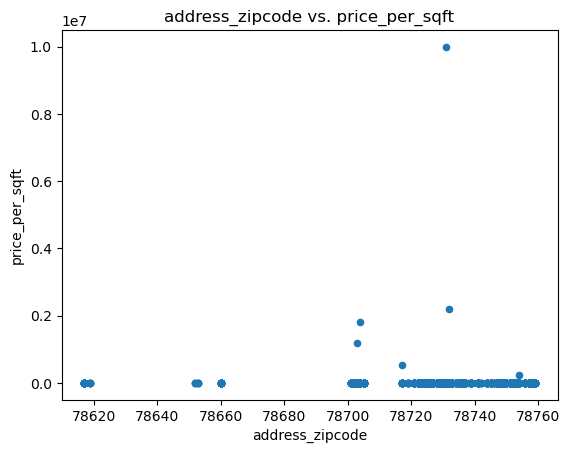

In [28]:
df3.plot.scatter(x = 'address_zipcode' , y = 'price_per_sqft' , title = 'address_zipcode vs. price_per_sqft' )
plt.show()

In [29]:
# Filterout outliers 
df3[df3.price_per_sqft > 500]

,address_zipcode,bathrooms,bedrooms,latitude,livingArea,longitude,propertyTaxRate,resoFactsStats_bathrooms,resoFactsStats_bathroomsFull,resoFactsStats_bathroomsHalf,...,schools_1_studentsPerTeacher,schools_1_totalCount,schools_2_distance,schools_2_rating,schools_2_studentsPerTeacher,schools_2_totalCount,latest_price,latest_saleyear,numPriceChanges,price_per_sqft
8,78732.0,8.0,6.0,30.371092,7740.0,-97.912605,1.98,8.0,6.0,2.0,...,17.0,1.0,5.7,7.0,17.0,1.0,5474997.0,2019.0,4.0,7.073640e+02
32,78734.0,3.0,3.0,30.371635,2944.0,-97.915474,1.98,3.0,2.0,1.0,...,16.0,1.0,4.3,7.0,18.0,1.0,1595000.0,2018.0,4.0,5.417799e+02
45,78734.0,2.0,3.0,30.384167,1893.0,-97.915993,1.98,2.0,2.0,0.0,...,16.0,1.0,4.8,7.0,18.0,1.0,1090000.0,2020.0,9.0,5.758056e+02
90,78732.0,7.0,6.0,30.336349,6990.0,-97.932343,1.98,7.0,5.0,2.0,...,17.0,1.0,7.7,7.0,17.0,1.0,5750000.0,2020.0,5.0,8.226037e+02
93,78732.0,NaN,NaN,30.332327,1.0,-97.911598,1.98,0.0,0.0,0.0,...,17.0,1.0,6.8,7.0,17.0,1.0,2195000.0,2019.0,1.0,2.195000e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16307,78702.0,3.0,3.0,30.266884,624.0,-97.718887,1.98,3.0,3.0,0.0,...,15.0,1.0,2.4,4.0,11.0,1.0,439000.0,2020.0,3.0,7.035256e+02
16334,78702.0,1.0,2.0,30.280849,720.0,-97.703316,1.98,1.0,1.0,0.0,...,15.0,1.0,3.3,8.0,17.0,1.0,405000.0,2020.0,3.0,5.625000e+02
16343,78721.0,2.0,3.0,30.272356,916.0,-97.695107,1.98,2.0,1.0,1.0,...,10.0,1.0,1.2,4.0,11.0,1.0,499000.0,2020.0,4.0,5.447598e+02
16370,78702.0,1.0,3.0,30.275751,1146.0,-97.715637,1.98,1.0,1.0,0.0,...,15.0,1.0,3.3,8.0,17.0,1.0,589000.0,2020.0,4.0,5.139616e+02


In [30]:
df3 = df3[df3.price_per_sqft <= 500]

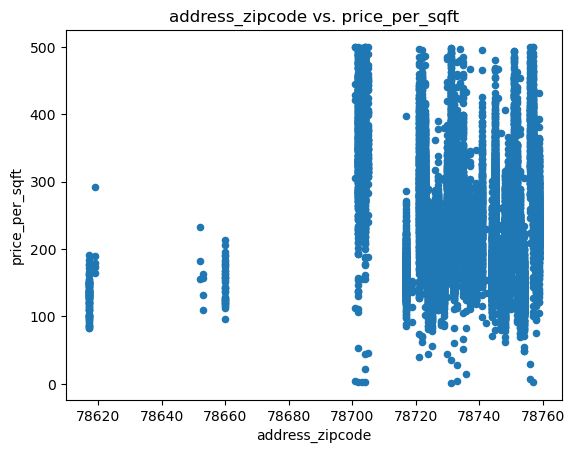

In [31]:
df3.plot.scatter(x = 'address_zipcode' , y = 'price_per_sqft' , title = 'address_zipcode vs. price_per_sqft' )
plt.show()

In [32]:
df3.shape

(14883, 35)

In [33]:
# Evaluate the amount of missing values in each columns
df3.isnull().sum()

address_zipcode                    0
bathrooms                        325
bedrooms                         260
latitude                           0
livingArea                         0
longitude                          0
propertyTaxRate                    0
resoFactsStats_bathrooms         188
resoFactsStats_bathroomsFull     121
resoFactsStats_bathroomsHalf     121
resoFactsStats_bedrooms          216
garageSpaces                       0
hasGarage                          0
hasSpa                             0
hasView                            0
parking                            0
stories                          618
taxAnnualAmount                 1145
taxAssessedValue                 578
schools_0_distance                 0
schools_0_rating                   0
schools_0_size                     0
schools_0_studentsPerTeacher      91
schools_1_rating                   0
schools_1_size                     0
schools_1_studentsPerTeacher     370
schools_1_totalCount               0
s

In [34]:
# Evaluate the amount of missing values across rows
df3[df3.isnull().sum(axis = 1) > 0]

,address_zipcode,bathrooms,bedrooms,latitude,livingArea,longitude,propertyTaxRate,resoFactsStats_bathrooms,resoFactsStats_bathroomsFull,resoFactsStats_bathroomsHalf,...,schools_1_studentsPerTeacher,schools_1_totalCount,schools_2_distance,schools_2_rating,schools_2_studentsPerTeacher,schools_2_totalCount,latest_price,latest_saleyear,numPriceChanges,price_per_sqft
6,78732.0,NaN,3.0,30.329847,2326.0,-97.926910,1.98,0.0,0.0,0.0,...,17.0,1.0,7.6,7.0,17.0,1.0,139990.0,2018.0,1.0,60.184867
11,78732.0,NaN,NaN,30.330782,1480.0,-97.925789,1.98,0.0,0.0,0.0,...,17.0,1.0,7.5,7.0,17.0,1.0,315000.0,2019.0,9.0,212.837838
12,78732.0,1.0,1.0,30.330755,704.0,-97.926483,1.98,1.0,1.0,0.0,...,17.0,1.0,7.6,7.0,17.0,1.0,150000.0,2018.0,5.0,213.068182
21,78732.0,6.0,4.0,30.341303,4219.0,-97.919540,1.98,6.0,4.0,2.0,...,17.0,1.0,6.9,7.0,17.0,1.0,825000.0,2019.0,3.0,195.543968
57,78732.0,5.0,5.0,30.342978,4783.0,-97.922836,1.98,5.0,5.0,0.0,...,17.0,1.0,7.0,7.0,17.0,1.0,1695000.0,2020.0,2.0,354.380096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16466,78751.0,NaN,NaN,30.311029,3700.0,-97.719620,1.98,0.0,0.0,0.0,...,16.0,1.0,1.2,8.0,17.0,1.0,1299900.0,2020.0,6.0,351.324324
16470,78723.0,2.0,3.0,30.317089,1665.0,-97.677162,1.98,2.0,2.0,0.0,...,13.0,1.0,1.3,3.0,14.0,1.0,405000.0,2018.0,7.0,243.243243
16474,78749.0,2.5,4.0,30.221970,2786.0,-97.875984,1.98,NaN,0.0,0.0,...,17.0,1.0,2.4,9.0,18.0,1.0,399000.0,2018.0,2.0,143.216080
16480,78749.0,2.5,3.0,30.218878,1700.0,-97.864960,1.98,NaN,0.0,0.0,...,17.0,1.0,7.0,7.0,17.0,1.0,384900.0,2018.0,1.0,226.411765


In [35]:
df3.mean().round(1)

address_zipcode                  78736.6
bathrooms                            2.7
bedrooms                             3.4
latitude                            30.3
livingArea                        2147.8
longitude                          -97.8
propertyTaxRate                      2.0
resoFactsStats_bathrooms             2.6
resoFactsStats_bathroomsFull         2.0
resoFactsStats_bathroomsHalf         0.4
resoFactsStats_bedrooms              3.4
garageSpaces                         1.2
hasGarage                            0.5
hasSpa                               0.1
hasView                              0.2
parking                              1.2
stories                              1.5
taxAnnualAmount                   8427.7
taxAssessedValue                430271.4
schools_0_distance                   0.9
schools_0_rating                     6.1
schools_0_size                     641.5
schools_0_studentsPerTeacher        14.5
schools_1_rating                     5.2
schools_1_size  

In [36]:
df3.shape

(14883, 35)

In [37]:
(df3.address_zipcode.min(), df3.address_zipcode.max())

(78617.0, 78759.0)

In [38]:
df3.address_zipcode.dtype

dtype('float64')

In [39]:
df3['zipcode'] = df3.address_zipcode.astype('int')

C:\Users\famma\AppData\Local\Temp\ipykernel_12172\3038893343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['zipcode'] = df3.address_zipcode.astype('int')


In [40]:
df3 = df3.set_index(['zipcode'])

In [41]:
df3.head()

,address_zipcode,bathrooms,bedrooms,latitude,livingArea,longitude,propertyTaxRate,resoFactsStats_bathrooms,resoFactsStats_bathroomsFull,resoFactsStats_bathroomsHalf,...,schools_1_studentsPerTeacher,schools_1_totalCount,schools_2_distance,schools_2_rating,schools_2_studentsPerTeacher,schools_2_totalCount,latest_price,latest_saleyear,numPriceChanges,price_per_sqft
zipcode,,,,,,,,,,,,,,,,,,,,,
78732,78732.0,5.0,4.0,30.354322,4060.0,-97.911278,1.98,5.0,4.0,1.0,...,17.0,1.0,6.0,7.0,17.0,1.0,715000.0,2018.0,1.0,176.108374
78732,78732.0,5.0,5.0,30.355553,4558.0,-97.912544,1.98,5.0,5.0,0.0,...,17.0,1.0,6.1,7.0,17.0,1.0,1025000.0,2020.0,2.0,224.879333
78732,78732.0,4.0,4.0,30.352081,4749.0,-97.912048,1.98,4.0,3.0,1.0,...,17.0,1.0,6.1,7.0,17.0,1.0,825000.0,2018.0,4.0,173.720783
78732,78732.0,4.0,4.0,30.356226,4867.0,-97.911697,1.98,4.0,4.0,0.0,...,17.0,1.0,6.0,7.0,17.0,1.0,849000.0,2019.0,7.0,174.440107
78732,78732.0,4.0,5.0,30.341896,3485.0,-97.907944,1.98,4.0,3.0,1.0,...,17.0,1.0,6.2,7.0,17.0,1.0,625000.0,2019.0,4.0,179.340029


# load the US Income data for Austin and merge it with Austin House Listings cleaned data

In [42]:
# load the us_income data
df1_inc = pd.read_csv('../01_raw_data/us_income_zipcode.csv', low_memory=False)

In [43]:
df1_inc.shape

(364998, 111)

In [44]:
df2_inc = df1_inc[df1_inc['ZIP'].between(78617,78759)]

In [45]:
df2_inc.shape

(1025, 111)

In [46]:
list(df2_inc.columns)

['ZIP',
 'Geography',
 'Geographic Area Name',
 'Households',
 'Households Margin of Error',
 'Households Less Than $10,000',
 'Households Less Than $10,000 Margin of Error',
 'Households $10,000 to $14,999',
 'Households $10,000 to $14,999 Margin of Error',
 'Households $15,000 to $24,999',
 'Households $15,000 to $24,999 Margin of Error',
 'Households $25,000 to $34,999',
 'Households $25,000 to $34,999 Margin of Error',
 'Households $35,000 to $49,999',
 'Households $35,000 to $49,999 Margin of Error',
 'Households $50,000 to $74,999',
 'Households $50,000 to $74,999 Margin of Error',
 'Households $75,000 to $99,999',
 'Households $75,000 to $99,999 Margin of Error',
 'Households $100,000 to $149,999',
 'Households $100,000 to $149,999 Margin of Error',
 'Households $150,000 to $199,999',
 'Households $150,000 to $199,999 Margin of Error',
 'Households $200,000 or More',
 'Households $200,000 or More Margin of Error',
 'Households Median Income (Dollars)',
 'Households Median Income

In [47]:
df2_inc = df2_inc.set_index(['ZIP'])

In [48]:
df2_inc.head()

,Geography,Geographic Area Name,Households,Households Margin of Error,"Households Less Than $10,000","Households Less Than $10,000 Margin of Error","Households $10,000 to $14,999","Households $10,000 to $14,999 Margin of Error","Households $15,000 to $24,999","Households $15,000 to $24,999 Margin of Error",...,"Nonfamily Households $150,000 to $199,999","Nonfamily Households $150,000 to $199,999 Margin of Error","Nonfamily Households $200,000 or More","Nonfamily Households $200,000 or More Margin of Error",Nonfamily Households Median Income (Dollars),Nonfamily Households Median Income (Dollars) Margin of Error,Nonfamily Households Mean Income (Dollars),Nonfamily Households Mean Income (Dollars) Margin of Error,Nonfamily Households Nonfamily Income in the Past 12 Months,Year
ZIP,,,,,,,,,,,,,,,,,,,,,
78617,860Z200US78617,ZCTA5 78617,7662.0,682.0,3.0,2.3,1.7,2.0,3.7,1.8,...,2.1,3.4,2.6,4.0,44941.0,7175.0,56019.0,12104.0,46.5,2021.0
78618,860Z200US78618,ZCTA5 78618,129.0,50.0,6.2,6.8,0.8,2.4,5.4,5.5,...,14.8,22.7,14.8,15.0,44688.0,32515.0,154152.0,98763.0,37.0,2021.0
78619,860Z200US78619,ZCTA5 78619,2159.0,372.0,0.0,2.2,1.0,1.2,0.0,2.2,...,0.0,25.9,0.0,25.9,86354.0,28771.0,75649.0,16152.0,16.8,2021.0
78620,860Z200US78620,ZCTA5 78620,6538.0,432.0,1.5,1.0,3.4,2.1,2.9,1.4,...,4.8,3.9,5.4,4.2,47183.0,12833.0,70972.0,13816.0,27.4,2021.0
78621,860Z200US78621,ZCTA5 78621,8103.0,552.0,5.0,2.3,2.2,1.4,2.4,1.4,...,12.2,15.1,2.0,3.0,72837.0,21942.0,80298.0,21264.0,39.2,2021.0


In [49]:
#Analyze Data across a row
dict(df2_inc.iloc[0])

{'Geography': '860Z200US78617',
 'Geographic Area Name': 'ZCTA5 78617',
 'Households': 7662.0,
 'Households Margin of Error': 682.0,
 'Households Less Than $10,000': 3.0,
 'Households Less Than $10,000 Margin of Error': 2.3,
 'Households $10,000 to $14,999': 1.7,
 'Households $10,000 to $14,999 Margin of Error': 2.0,
 'Households $15,000 to $24,999': 3.7,
 'Households $15,000 to $24,999 Margin of Error': 1.8,
 'Households $25,000 to $34,999': 6.6,
 'Households $25,000 to $34,999 Margin of Error': 2.4,
 'Households $35,000 to $49,999': 19.2,
 'Households $35,000 to $49,999 Margin of Error': 6.4,
 'Households $50,000 to $74,999': 20.1,
 'Households $50,000 to $74,999 Margin of Error': 4.9,
 'Households $75,000 to $99,999': 10.3,
 'Households $75,000 to $99,999 Margin of Error': 3.9,
 'Households $100,000 to $149,999': 23.0,
 'Households $100,000 to $149,999 Margin of Error': 5.4,
 'Households $150,000 to $199,999': 6.0,
 'Households $150,000 to $199,999 Margin of Error': 2.8,
 'Household

In [50]:
selected_cols = [col for col in df2_inc.columns if 'Mean Income' in col and 'Margin of Error' not in col]

In [51]:
df2_inc = df2_inc[selected_cols]

In [52]:
df2_inc.head()

,Households Mean Income (Dollars),Families Mean Income (Dollars),Married-Couple Families Mean Income (Dollars),Nonfamily Households Mean Income (Dollars)
ZIP,,,,
78617,99354.0,106461.0,NaN,56019.0
78618,105468.0,92582.0,NaN,154152.0
78619,165887.0,169968.0,NaN,75649.0
78620,151574.0,165526.0,NaN,70972.0
78621,94097.0,95930.0,NaN,80298.0


In [53]:
df2_inc.shape

(1025, 4)

In [54]:
df2_inc_average = df2_inc.mean(axis = 1).round(1)

In [55]:
merged_df = pd.merge(df3, df2_inc_average, on='zipcode', how='left')

ValueError: Cannot merge a Series without a name